In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [198]:
df_train = pd.read_csv('../data/따릉이/train.csv')
df_train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [199]:
df_train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [200]:
df_test = pd.read_csv('../data/따릉이/test.csv')
df_test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [201]:
df_test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# preprocessing

In [16]:
df_bike = pd.concat([df_train.iloc[:,:-1],df_test], axis=0)
df_bike

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [73]:
df_bike.duplicated().sum()

0

# Nan값 파악

In [61]:
df_bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        3
hour_bef_precipitation      3
hour_bef_windspeed         10
hour_bef_humidity           3
hour_bef_visibility         3
hour_bef_ozone            111
hour_bef_pm10             127
hour_bef_pm2.5            153
dtype: int64

In [69]:
df_bike[df_bike['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
idx = df_bike[df_bike['hour_bef_temperature'].isnull()].index
idx
df_bike = df_bike.drop(index = idx)
df_bike

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [100]:
df_bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone            108
hour_bef_pm10             124
hour_bef_pm2.5            150
dtype: int64

## 데이터 살펴보기

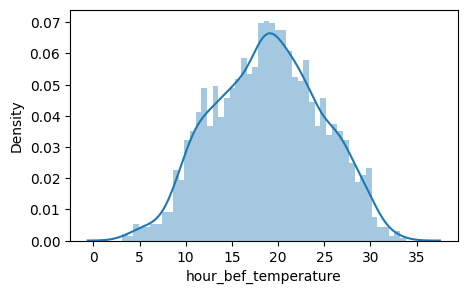

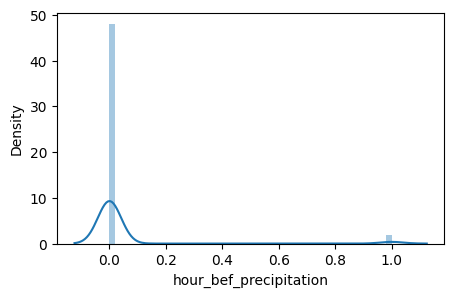

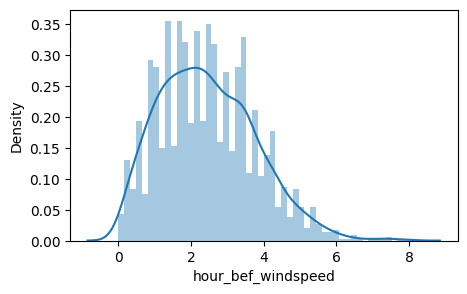

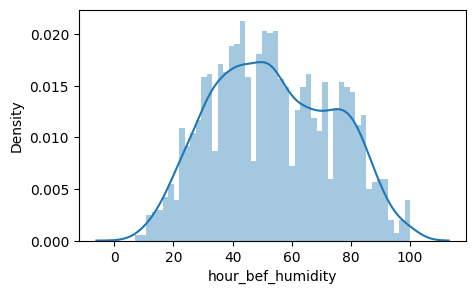

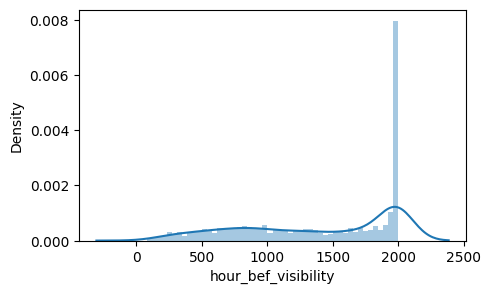

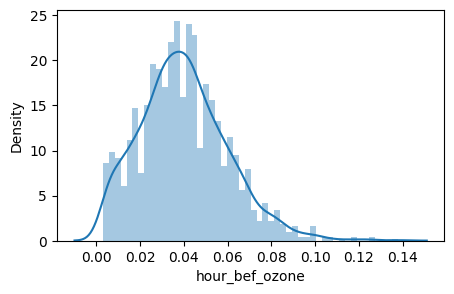

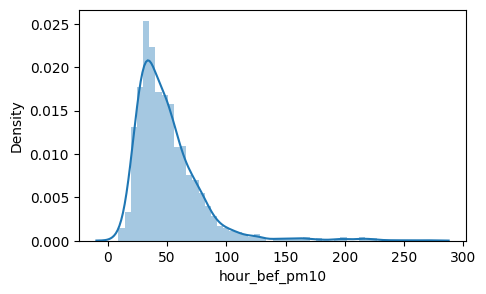

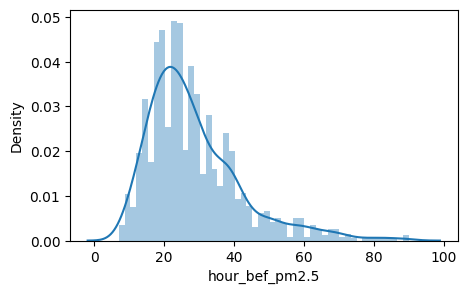

In [85]:
for col in df_bike.columns[2:]:
    plt.figure(figsize=(5,3))
    sns.distplot(df_bike[col], bins=50 )

In [86]:
# hour_bef_visibilty 2000 이상치 확인필요
# 2000 이 제일 맑은 최대치
df_bike[df_bike['hour_bef_visibility']==2000]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN
16,30,21,18.8,0.0,2.2,34.0,2000.0,0.040,32.0,14.0
22,37,16,19.4,0.0,5.9,21.0,2000.0,0.052,52.0,14.0
28,48,15,18.0,0.0,3.3,20.0,2000.0,0.045,54.0,21.0
...,...,...,...,...,...,...,...,...,...,...
701,2127,17,29.6,0.0,2.5,19.0,2000.0,0.081,23.0,18.0
703,2134,18,29.2,0.0,3.1,23.0,2000.0,0.058,26.0,11.0
705,2141,17,27.8,0.0,1.5,27.0,2000.0,0.068,27.0,17.0
708,2146,3,21.6,0.0,2.6,41.0,2000.0,0.044,25.0,16.0


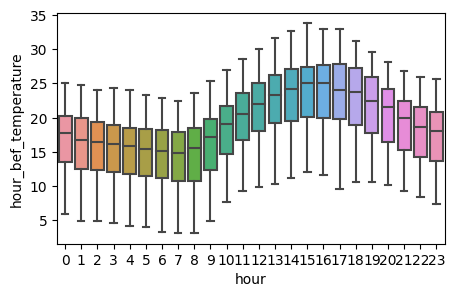

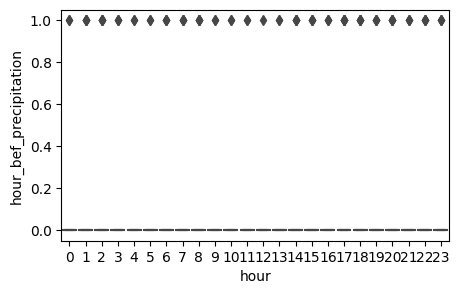

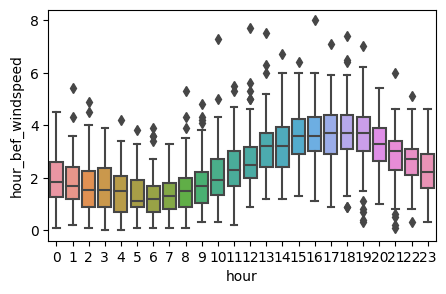

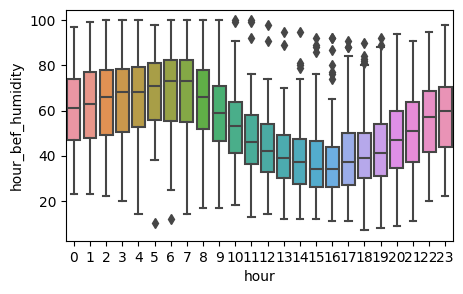

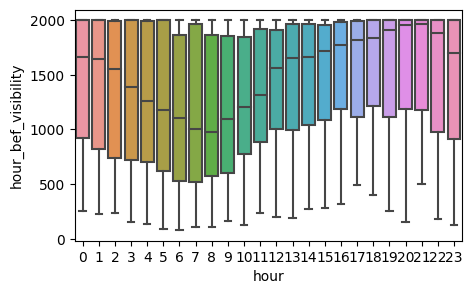

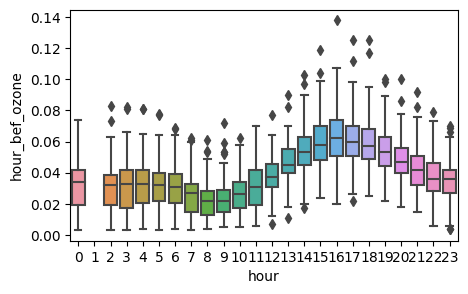

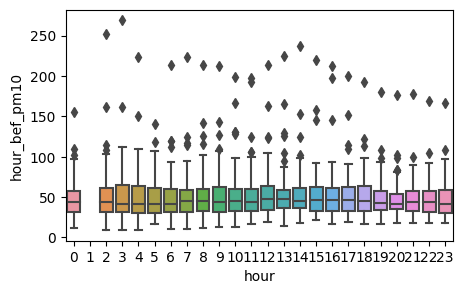

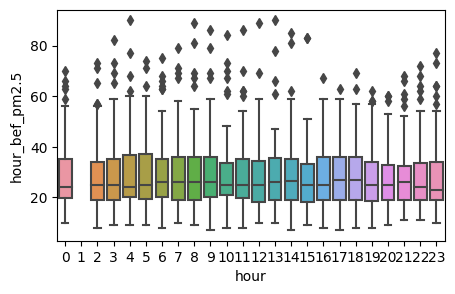

In [87]:
for col in df_bike.columns[2:]:
    plt.figure(figsize=(5,3))
    sns.boxplot(df_bike, x='hour', y=col)

 ## Nan 값 : 시간, 강수 유무에 따라 채우기

In [88]:
df_bike[df_bike['hour_bef_precipitation']==1].isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            5
hour_bef_pm10             7
hour_bef_pm2.5            8
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

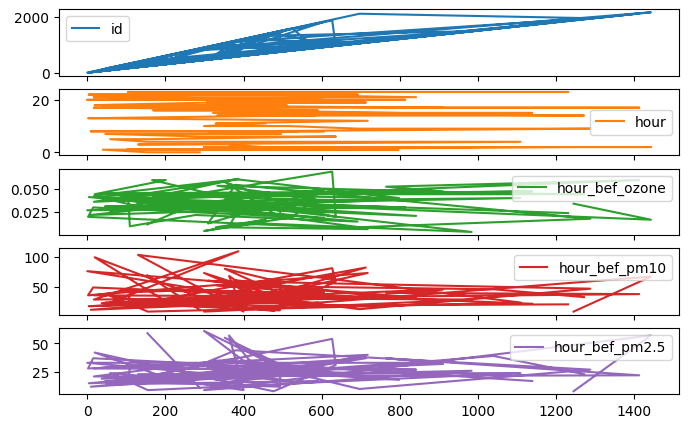

In [89]:
col = ['id','hour', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'] 
df_bike[df_bike['hour_bef_precipitation']==1][col].sort_values(by='hour').plot(figsize=(8,5),subplots=True)

In [90]:
col = ['id','hour', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'] 
df_bike[df_bike['hour_bef_precipitation']==1].sort_values(by='hour')[col][:30]

,id,hour,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
288,825,0,0.036,12.0,11.0
154,230,0,0.012,69.0,59.0
40,115,1,NaN,NaN,NaN
507,782,1,NaN,NaN,NaN
102,297,1,NaN,NaN,NaN
796,1214,1,NaN,NaN,NaN
222,346,1,NaN,NaN,NaN
1245,1882,2,0.034,9.0,8.0
1443,2161,2,0.017,67.0,57.0
299,861,2,0.036,9.0,9.0


## hour_bef_ozone

In [112]:
df_bike[df_bike['hour_bef_ozone'].isnull()].sort_values(by='hour')

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1211,1829,16,23.0,0.0,2.9,26.0,2000.0,NaN,22.0,8.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0
451,695,17,20.1,0.0,4.5,25.0,2000.0,NaN,58.0,29.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0


<AxesSubplot:xlabel='hour', ylabel='hour_bef_ozone'>

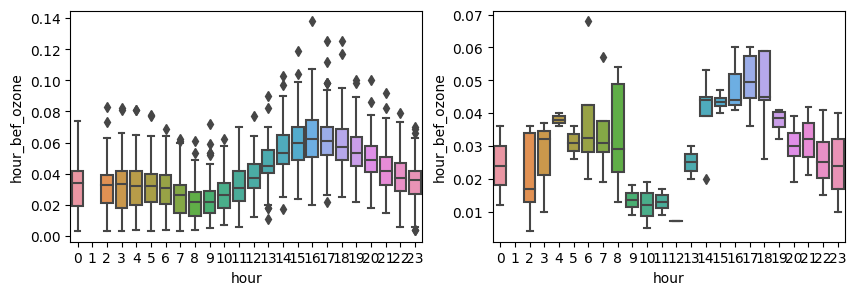

In [107]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10,3))
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==0].sort_values(by='hour'), x='hour', y='hour_bef_ozone',ax=axs[0])
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==1].sort_values(by='hour'), x='hour', y='hour_bef_ozone',ax=axs[1])

## 미세먼지 hour_bef_pm2.5
* 비 안 온날은 비슷
* 비 온날은 불규칙

<AxesSubplot:xlabel='hour', ylabel='hour_bef_pm2.5'>

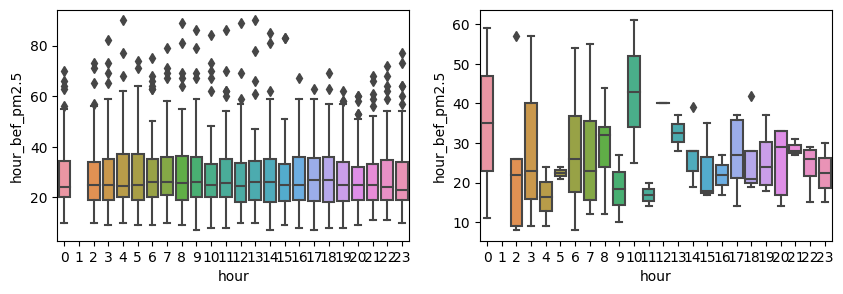

In [108]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10,3))
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==0].sort_values(by='hour'), x='hour', y='hour_bef_pm2.5',ax=axs[0])
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==1].sort_values(by='hour'), x='hour', y='hour_bef_pm2.5',ax=axs[1])

## 미세먼지 hour_bef_pm10
* 비 안 온날은 비슷
* 비 온날은 불규칙

<AxesSubplot:xlabel='hour', ylabel='hour_bef_pm10'>

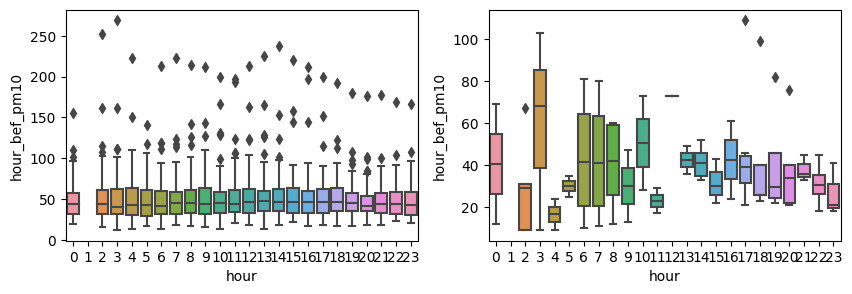

In [106]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10,3))
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==0].sort_values(by='hour'), x='hour', y='hour_bef_pm10',ax=axs[0])
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==1].sort_values(by='hour'), x='hour', y='hour_bef_pm10',ax=axs[1])

## hour_bef_windspeed

<AxesSubplot:xlabel='hour', ylabel='hour_bef_windspeed'>

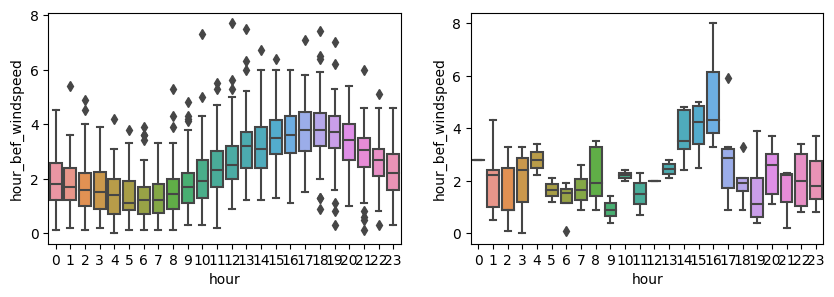

In [105]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10,3))
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==0].sort_values(by='hour'), x='hour', y='hour_bef_windspeed',ax=axs[0])
sns.boxplot(df_bike[df_bike['hour_bef_precipitation']==1].sort_values(by='hour'), x='hour', y='hour_bef_windspeed',ax=axs[1])

# Nan값 채우기

In [202]:
df_bike = pd.concat([df_train.iloc[:,:-1],df_test], axis=0)
idx = df_bike[df_bike['hour_bef_temperature'].isnull()].index
df_bike = df_bike.drop(index = idx)
df_bike = df_bike.reset_index(drop=True)
df_bike

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
2165,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
2166,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
2167,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
2168,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [203]:
df_bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone            108
hour_bef_pm10             124
hour_bef_pm2.5            150
dtype: int64

## hour_bef_ozone

In [204]:
# 0시 강수 없는날
df_bike[(df_bike['hour_bef_precipitation']==0) &  (df_bike['hour']==0)]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
25,45,0,11.7,0.0,3.5,80.0,895.0,0.044,58.0,31.0
80,126,0,15.5,0.0,0.9,30.0,2000.0,0.004,51.0,32.0
124,183,0,18.5,0.0,0.9,46.0,1848.0,0.008,69.0,44.0
149,223,0,18.6,0.0,0.3,58.0,554.0,0.053,110.0,63.0
167,249,0,16.6,0.0,2.3,47.0,1048.0,0.074,76.0,41.0
...,...,...,...,...,...,...,...,...,...,...
2087,1885,0,18.7,0.0,0.8,60.0,2000.0,0.017,35.0,20.0
2094,1900,0,21.7,0.0,4.3,40.0,2000.0,0.039,26.0,13.0
2118,1976,0,20.2,0.0,3.5,81.0,256.0,0.059,67.0,46.0
2124,2004,0,21.5,0.0,2.6,74.0,1348.0,0.014,32.0,24.0


In [205]:
temp = df_bike[(df_bike['hour_bef_precipitation']==0) &  (df_bike['hour']==0)]
temp.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        1
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            1
dtype: int64

In [206]:
temp_null = temp.isnull().sum().to_frame()
col = temp_null[temp_null[0]==1].index
col

Index(['hour_bef_windspeed', 'hour_bef_pm2.5'], dtype='object')

In [207]:
temp[temp['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0


In [208]:
df_bike.loc[376,'hour_bef_windspeed']

nan

In [209]:
idx = temp[temp['hour_bef_windspeed'].isnull()].index
idx

Int64Index([376], dtype='int64')

In [210]:
new = temp['hour_bef_windspeed'].mean()
new

1.9534883720930236

In [152]:
# df_bike.loc[idx,'hour_bef_windspeed'] = new

## 시간 기준으로 채우기

In [219]:
df_bike = pd.concat([df_train.iloc[:,:-1],df_test], axis=0)
idx = df_bike[df_bike['hour_bef_temperature'].isnull()].index
df_bike = df_bike.drop(index = idx)
df_bike = df_bike.reset_index(drop=True)
df_bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone            108
hour_bef_pm10             124
hour_bef_pm2.5            150
dtype: int64

In [220]:
hour = [h for h in range(0,24)]
for h in hour:
    temp = df_bike[(df_bike['hour_bef_precipitation']==0) &  (df_bike['hour']== h)]
    
    # null 값이 있는 column 추출
    temp_null = temp.isnull().sum().to_frame()
    columns = temp_null[temp_null[0]==1].index
    print("시간: ", h)
    print("컬럼명: ",columns)
    print('nan값개수: ', temp.isnull().sum())
    
    # 인덱스 추출
    for col in columns:
        idx = temp[temp[col].isnull()].index
        new = temp[col].mean()
        
        df_bike.loc[idx,col] = new

시간:  0
컬럼명:  Index(['hour_bef_windspeed', 'hour_bef_pm2.5'], dtype='object')
nan값개수:  id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        1
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            1
dtype: int64
시간:  1
컬럼명:  Index(['hour_bef_windspeed'], dtype='object')
nan값개수:  id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            86
hour_bef_pm10             86
hour_bef_pm2.5            86
dtype: int64
시간:  2
컬럼명:  Index(['hour_bef_windspeed', 'hour_bef_pm2.5'], dtype='object')
nan값개수:  id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        1
hour_bef_humidity       

In [217]:
 df_bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone            102
hour_bef_pm10             119
hour_bef_pm2.5            141
dtype: int64

In [222]:
temp[temp[col].isnull()].index

Int64Index([819], dtype='int64')

In [223]:
df_bike.loc[idx,col]

819    28.551724
Name: hour_bef_pm2.5, dtype: float64